## Data Generation
Command history:

    %run parse_log.py logs/6players/mixed outlogs/6players/mixed parsed.hdf
    %run parse_log.py logs/6players/better outlogs/6players/better parsed.hdf
    %run parse_log.py logs/6players/chron outlogs/6players/chron parsed.hdf
    %run parse_log.py logs/6players/stupid outlogs/6players/stupid parsed.hdf
    
    %run parse_log.py logs/5players/mixed outlogs/5players/mixed parsed.hdf
    %run parse_log.py logs/5players/better outlogs/5players/better parsed.hdf
    %run parse_log.py logs/5players/chron outlogs/5players/chron parsed.hdf
    %run parse_log.py logs/5players/stupid outlogs/5players/stupid parsed.hdf
    
    %run parse_log.py logs/4players/mixed outlogs/4players/mixed parsed.hdf
    %run parse_log.py logs/4players/better outlogs/4players/better parsed.hdf
    %run parse_log.py logs/4players/chron outlogs/4players/chron parsed.hdf
    %run parse_log.py logs/4players/stupid outlogs/4players/stupid parsed.hdf
    
    %run parse_log.py logs/3players/mixed outlogs/3players/mixed parsed.hdf
    %run parse_log.py logs/3players/better outlogs/3players/better parsed.hdf
    %run parse_log.py logs/3players/chron outlogs/3players/chron parsed.hdf
    %run parse_log.py logs/3players/stupid outlogs/3players/stupid parsed.hdf
    %run parse_log.py logs/3players/chronvbetter outlogs/3players/chronvbetter parsed.hdf

In [8]:
%run parse_log.py logs/ outlogs/test parsed

logs\mylog0.game4.log list index out of range
logs\mylog1.game15.log list index out of range
logs\mylog2.game9.log list index out of range
logs\mylog3.game20.log list index out of range


In [7]:
df = pd.read_hdf("outlogs/few/parsed0.hdf")
df.sample(10)

Player 0 Alaska  Player 0 Northwest Territories  Player 0 Greenland  \
106              0.0                             0.0                 0.0   
95               0.0                             1.0                 0.0   
40               1.0                             1.0                 0.0   
70               1.0                             1.0                 0.0   
48               1.0                             1.0                 0.0   
2                0.0                             0.0                 0.0   
121              0.0                             0.0                 0.0   
72               1.0                             1.0                 0.0   
24               1.0                             1.0                 0.0   
10               0.0                             1.0                 0.0   

     Player 0 Alberta  Player 0 Ontario  Player 0 Quebec  \
106               0.0               0.0              0.0   
95                1.0               0.0              0.0   
40                0.0               0.0              0.0   
70                0.0               0.0              0.0   
48                0.0               0.0              0.0   
2                 0.0               0.0              0.0   
121               0.0               0.0              0.0   
72                0.0               0.0              0.0   
24                0.0               0.0              0.0   
10                0.0               0.0              0.0   

     Player 0 Western United States  Player 0 Eastern United States  \
106                             0.0                             0.0   
95                              0.0                             0.0   
40                              0.0                             0.0   
70                              0.0                             0.0   
48                              0.0                             0.0   
2                               0.0                             0.0   
121                             0.0                             0.0   
72                              0.0                             0.0   
24                              0.0                             0.0   
10                              0.0                             0.0   

     Player 0 Mexico  Player 0 Venezuala  ...  \
106              0.0                 0.0  ...   
95               1.0                 0.0  ...   
40               1.0                 0.0  ...   
70               1.0                 0.0  ...   
48               1.0                 0.0  ...   
2                0.0                 0.0  ...   
121              0.0                 0.0  ...   
72               1.0                 0.0  ...   
24               0.0                 0.0  ...   
10               0.0                 0.0  ...   

     Player 2 player_average_boundary_fortifications  \
106                                         5.500000   
95                                          3.833333   
40                                          1.000000   
70                                          2.300000   
48                                          1.333333   
2                                          -1.000000   
121                                         2.800000   
72                                          2.400000   
24                                          1.000000   
10                                          1.000000   

     Player 0 player_connected_components  \
106                                   1.0   
95                                    6.0   
40                                    4.0   
70                                    4.0   
48                                    4.0   
2                                     1.0   
121                                   3.0   
72                                    4.0   
24                                    2.0   
10                                    1.0   

     Player 1 player_connected_components  \
106                        

## Data Analysis

In [28]:
from scipy.special import softmax

import os
import itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py as h5

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2
import keras

In [9]:
folder = "outlogs/02_nth_turn_datasets/"
turns = []
for entry in os.scandir(folder):
    if (entry.path.endswith(".hdf") and entry.is_file()):
        turn = int(entry.path.split("_")[-2])
        turns.append(turn)
print(turns)

[150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700]


In [33]:
 #https://dfrieds.com/machine-learning/visual-introduction-classification-logistic-regression-python.html
def plot_cm(cm, num_players, title, cmap=plt.cm.Blues, player_start_index=0):
    classes = ["Player {}".format(i) for i in range(player_start_index,num_players+player_start_index)]
    
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(num_players)
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True winner', labelpad=12)
    plt.xlabel('Predicted winner', labelpad=12)
    plt.tight_layout()
    plt.show()
def plot_cms(cms, num_players, suptitle, titles, cmap=plt.cm.Blues, figsize=(12,8), savefile=None, player_start_index=0):
    classes = ["Player {}".format(i) for i in range(player_start_index,num_players+player_start_index)]
    
    fig, axs = plt.subplots(1, len(cms), figsize=figsize)
    for i in range(len(cms)):
        cm = cms[i]
        ax = axs[i]
        ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.set_title(titles[i])
        tick_marks = np.arange(num_players)
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(classes, rotation=0)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(classes)
        thresh = cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", 
                     fontsize=16, color="white" if cm[i, j] > thresh else "black")
        ax.set_ylabel('True winner', labelpad=12)
        ax.set_xlabel('Predicted winner', labelpad=12)
        
    plt.suptitle(suptitle)  
    plt.tight_layout()
    if savefile is not None:
        plt.savefig(savefile)
    plt.show()

In [3]:
folder = "outlogs/nth turn datasets/"
#folder = "outlogs/02_nth_turn_datasets/"
num_players = 6
i_features = ['Player {} Africa', 'Player {} Asia', 'Player {} Australia', 'Player {} Europe', 'Player {} South America',
            'Player {} North America', 'Player {} Continental Reward', 'Player {} Country Count', 
            'Player {} Total Reinforcements', 'Player {} Troop Count', 'Player {} Troop Increase Due to Country Count',] 
features = []
for i in range(num_players):
    features = features + [feature.format(i) for feature in i_features]
targets = ["Player {} soft score".format(i) for i in range(num_players)]

def load_data(w = 1.0, drop_ties=True):
    """ w is controls how much weight we assign to winning.
    If w is 0.7, then 1st place gets 0.7, 2nd place gets 0.7*(1-0.7) = 0.21 and so on
    """
    X, y = None, None
    X_train, X_test, y_train, y_test, y_train_1col = None, None, None, None, None
    for entry in os.scandir(folder):
        if not (entry.path.endswith(".hdf") and entry.is_file()):
            continue
        splits = entry.path.split("_")
        turn = int(splits[-2])
        
        fi = h5.File(entry.path, 'r')
        values = np.array(fi.get('/dataframe/block0_values'))
        colnames = np.array(fi.get('/dataframe/block0_items')).astype(str)
        data = pd.DataFrame(values, columns=colnames)
            
        #Only needed for the second nth turn datasets
        #df.columns = df.columns.astype(str)
        #df.to_hdf('UPDATED_' + filename, 'dataframe')
        #for i, col in enumerate(['winner', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth'][:num_players]):
        #    player_index = int(data[col][0])
        #    data[f'Player {player_index} soft score'] = (i+1)**-1
        
        #data = pd.read_hdf(entry.path)
        #del data['total_numer_turns_in_game']
        if drop_ties:
            data = data.dropna() #drop stalemate games for now
        data[targets] = data[targets] ** -1
        data[targets] = (1-w)**(data[targets]-1)*(w**(data[targets] < num_players-0.1))
        #data[targets] = softmax(data[targets], axis=1) #convert to probabilities
        X_ = data.filter(items=features)
        y_ = data.filter(items=targets)
        #print(X.columns.values)
        #print(y.head())
        train_index, test_index = list(ShuffleSplit(n_splits=1, test_size=0.2).split(X_))[0]
        X_train_, X_test_, y_train_, y_test_ =  X_.iloc[train_index], X_.iloc[test_index], y_.iloc[train_index], y_.iloc[test_index]
        y_train_1col_ = data['winner'].astype(int).iloc[train_index]
        y_test_1col_ = data['winner'].astype(int).iloc[test_index]
        if X is None:
            X = X_
            y = y_
            X_train = X_train_
            X_test = X_test_
            y_train = y_train_
            y_test = y_test_
            y_train_1col = y_train_1col_
            y_test_1col = y_test_1col_
        else:
            X = pd.concat([X, X_], axis=0)
            y = pd.concat([y, y_], axis=0)
            X_train = pd.concat([X_train, X_train_], axis=0)
            X_test = pd.concat([X_test, X_test_], axis=0)
            y_train = pd.concat([y_train, y_train_], axis=0)
            y_test = pd.concat([y_test, y_test_], axis=0)
            y_train_1col = pd.concat([y_train_1col, y_train_1col_], axis=0)
            y_test_1col = pd.concat([y_test_1col, y_test_1col_], axis=0)
        print(turn,"th turn dataset loaded", sep='')
    return {"X":X, "y":y,
                "X_train":X_train, "y_train":y_train,
                "X_test":X_test, "y_test":y_test,
                "y_train_1col": y_train_1col, "y_test_1col": y_test_1col}

In [11]:
def run_pca_knn(data, n_components, k):
    X_train = data["X_train"]
    y_train = data["y_train"]
    X_test = data["X_test"]
    y_test = data["y_test"]
    y_train_1col = data["y_train_1col"]
    y_true = np.argmax(y_test.values, axis=1)
    
    pca = PCA(n_components=n_components)

    V_train = pca.fit_transform(X_train)
    V_test = pca.transform(X_test)

    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(V_train, y_train_1col)

    #pred_probs = knc.predict_proba(V_test)
    #y_pred = knc.classes_[np.argmax(pred_probs, axis=1)]
    y_pred = knc.predict(V_test)
    acc = knc.score(V_test, y_true)
    cm = confusion_matrix(y_true, y_pred)
    
    #plot_cm(cm, num_players, "KNeighborsClassifier")
    return knc, cm, acc

In [21]:
def run_pca_knn_gridsearch(data):
    X_train = data["X_train"]
    y_train = data["y_train"]
    X_test = data["X_test"]
    y_test = data["y_test"]
    y_train_1col = data["y_train_1col"]
    y_true = np.argmax(y_test.values, axis=1)
    
    best_knc = None
    best_acc = 0
    best_params = (0,0)
    
    for n_components in [6,12,30,36,60]:
        pca = PCA(n_components=n_components)
        V_train = pca.fit_transform(X_train)
        V_test = pca.transform(X_test)
        
        #Note: I tried 4 and 5 too with a smaller number of n_components
        for k in [2,3,6,10,15,30,50]:
            
            knc = KNeighborsClassifier(n_neighbors=k)
            knc.fit(V_train, y_train_1col)

            #pred_probs = knc.predict_proba(V_test)
            #y_pred = knc.classes_[np.argmax(pred_probs, axis=1)]
            y_pred = knc.predict(V_test)
            acc = knc.score(V_test, y_true)

            if acc > best_acc:
                best_acc = acc
                best_params = {"n_components":n_components, "n_neighbors":k}
                best_knc = knc
                cm = confusion_matrix(y_true, y_pred)
    
    #plot_cm(cm, num_players, "KNeighborsClassifier")
    return best_knc, cm, best_acc, best_params

In [30]:
def run_random_forest_gridsearch(data):
    X_train = data["X_train"]
    y_train = data["y_train"]
    X_test = data["X_test"]
    y_test = data["y_test"]
    y_train_1col = data["y_train_1col"]
    y_true = np.argmax(y_test.values, axis=1)
    
    #train random forest
    #[12, 51, 200]
    param_grid = {'max_depth': [6,12,18,24,30,36], 'max_features': [36,42,48,51,60], 'n_estimators': [100,200]}
    rfc = RandomForestClassifier(oob_score = True, warm_start=False)
    gridsearch_cv = GridSearchCV(rfc, param_grid, n_jobs=-1)
    gridsearch_cv.fit(X_train, y_train_1col)

    #get confusion matrix for random forest
    y_pred = gridsearch_cv.predict(X_test)
    acc = gridsearch_cv.score(X_test, y_true)
    cm = confusion_matrix(y_true, y_pred)
    
    return gridsearch_cv.best_estimator_, cm, acc, gridsearch_cv.best_params_

In [17]:
def run_random_forest(data):
    X_train = data["X_train"]
    y_train = data["y_train"]
    X_test = data["X_test"]
    y_test = data["y_test"]
    y_train_1col = data["y_train_1col"]
    y_true = np.argmax(y_test.values, axis=1)
    
    #train random forest
    params = {'max_depth': 12, 'max_features': 51, 'n_estimators': 200}
    rfc = RandomForestClassifier(**params, n_jobs = -1, oob_score = True, warm_start=False)
    rfc.fit(X_train, y_train_1col)
    sorted_indices = np.argsort(rfc.feature_importances_)

    feature_importances = list(np.array(features)[sorted_indices])[::-1]

    #get confusion matrix for random forest
    pred_probs = rfc.predict_proba(X_test)
    y_pred = rfc.classes_[np.argmax(pred_probs, axis=1)]
    acc = rfc.score(X_test, y_true)
    cm = confusion_matrix(y_true, y_pred)
    #plot_cm(cm, num_players, "Random Forest")
    
    return rfc, cm, acc, feature_importances

In [18]:
def run_regression(data):
    """Runs a multinomial logistic regression"""
    X_train = data["X_train"]
    y_train = data["y_train"]
    X_test = data["X_test"]
    y_test = data["y_test"]
    y_train_1col = data["y_train_1col"]
            
    #Set up model
    input_dim = len(features)
    output_dim = num_players
    lnet = Sequential()
    dense = Dense(output_dim, input_dim=input_dim, activation='softmax', kernel_regularizer=l1_l2(l1=1e-4, l2=1e-3))
    lnet.add(dense)
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    lnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    #train
    lnet.fit(X_train, y_train, batch_size=64, epochs=30, verbose=1, validation_data=(X_test, y_test))
    pred_probs = lnet.predict(X_test)
    
    #lreg = LogisticRegressionCV(multi_class="multinomial", solver="saga", max_iter=500, n_jobs=-1)
    #lreg.fit(X_train, y_train_1col)
    #pred_probs = lreg.predict_proba(X_test)

    y_true = np.argmax(y_test.values, axis=1) #use argsort to get all the positions instead of just winner
    y_pred = np.argmax(pred_probs, axis=1)
    acc = np.mean(y_true == y_pred)
    cm = confusion_matrix(y_true, y_pred)

    #plot confusion matrix 
    #plot_cm(cm, num_players, "Logistic Regression")

    return lnet, cm, acc

In [6]:
def plot_scree(percent_var, title, s_vert=None):
    """Plots a scree graph given the s values, a PCA object, and a scree graph title. Optionally you can add a vertical
    dashed black line at s=s_vert to show a cutoff chosen for using the projection
    """
    ss = np.arange(len(percent_var))
    plt.plot(ss, percent_var, label="Individual")
    plt.plot(ss, np.cumsum(percent_var), label="Cumulative")
    if s_vert is not None:
        plt.plot([s_vert, s_vert], [0, 100], ls="--", color="black", label="s={}".format(s_vert))
    plt.xlabel("s")
    plt.ylabel("% variance $\sigma^2$")
    plt.title(title)
    plt.legend()
    plt.show()

In [4]:
data = load_data(w=1)

200th turn dataset loaded
300th turn dataset loaded
350th turn dataset loaded
400th turn dataset loaded
450th turn dataset loaded
500th turn dataset loaded
550th turn dataset loaded
600th turn dataset loaded
650th turn dataset loaded


In [5]:
u, sig, vhat = np.linalg.svd(data["X"])

In [ ]:
var = sig**2
np.sort(var)
percent_var = 100*var/var.sum()

In [ ]:
plot_scree(percent_var, "Scree plot for PCA", s_vert=6)

In [22]:
knc, cm3, acc3, knc_best_params = run_pca_knn_gridsearch(data)
print(knc_best_params)

{'n_components': 60, 'n_neighbors': 30}


In [31]:
rfc, cm2, acc2, rfc_best_params = run_random_forest_gridsearch(data)
print(rfc_best_params)

{'max_depth': 12, 'max_features': 51, 'n_estimators': 200}


In [19]:
lnet, cm1, acc1 = run_regression(data)
#knc, cm3, acc3 = run_pca_knn(data)


Train on 32530 samples, validate on 8137 samples
Epoch 1/30
32530/32530 [==============================] - 1s 34us/step - loss: 13.1507 - accuracy: 0.1863 - val_loss: 8.8582 - val_accuracy: 0.2328
Epoch 2/30
32530/32530 [==============================] - 1s 24us/step - loss: 6.7481 - accuracy: 0.2671 - val_loss: 4.9736 - val_accuracy: 0.3224
Epoch 3/30
32530/32530 [==============================] - 1s 25us/step - loss: 3.8343 - accuracy: 0.3528 - val_loss: 2.7361 - val_accuracy: 0.4241
Epoch 4/30
32530/32530 [==============================] - 1s 25us/step - loss: 2.2416 - accuracy: 0.4841 - val_loss: 1.7765 - val_accuracy: 0.5642
Epoch 5/30
32530/32530 [==============================] - 1s 26us/step - loss: 1.6759 - accuracy: 0.5809 - val_loss: 1.5021 - val_accuracy: 0.6187
Epoch 6/30
32530/32530 [==============================] - 1s 26us/step - loss: 1.4833 - accuracy: 0.6144 - val_loss: 1.3771 - val_accuracy: 0.6350
Epoch 7/30
32530/32530 [==============================] - 1s 25us/s

Accuracies:
Logistic Regresion: 0.6925156691655401
Random Forest: 0.7057883740936463
k-Nearest Neighbors 0.6832985129654664


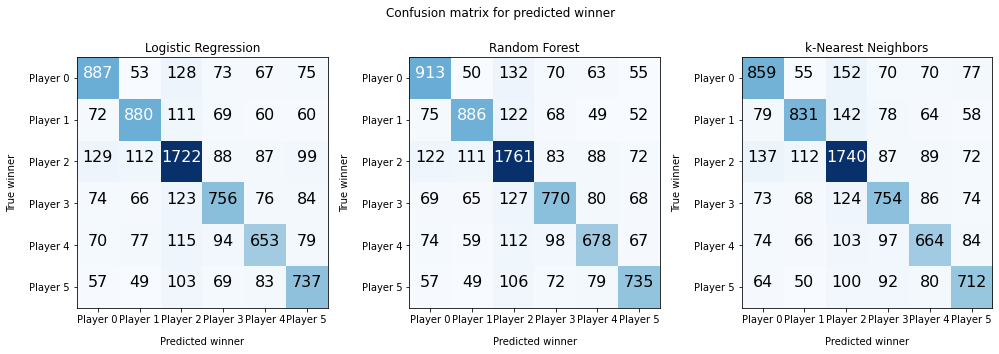

In [34]:
print("Accuracies:\n=============")
print("Logistic Regresion:", acc1)
print("Random Forest:", acc2)
print("k-Nearest Neighbors", acc3)

plot_cms([cm1,cm2,cm3], num_players, "Confusion matrix for predicted winner",
         ["Logistic Regression", "Random Forest", "k-Nearest Neighbors"], figsize=(14,5), savefile="cm_model_comparison.svg")

In [10]:
data = load_data()
X = data["X"]
y = data["y"]

200th turn dataset loaded
300th turn dataset loaded
350th turn dataset loaded
400th turn dataset loaded
450th turn dataset loaded
500th turn dataset loaded
550th turn dataset loaded
600th turn dataset loaded
650th turn dataset loaded


In [59]:
def plot_tsne(X_embedded, y, perplex, ax=None):
    y_winners = np.argmax(y.values, axis=1)
    
    if ax is None:
        show = True
        fig, ax = plt.subplots(1,1,figsize=(12,8))
    else:
        show = False
        
    for winner in np.unique(y_winners):
        xs = X_embedded[y_winners == winner]
        ax.scatter(xs[:,0], xs[:,1], marker='.', s=4, alpha=0.5, label="Player {} win".format(winner+1), )
    ax.legend(markerscale=5)
    ax.set_title(f"t-SNE perplexity = {perplex}")
    plt.suptitle("Aggregated 6 player games")
    if show:
        plt.show()

(40667, 2)


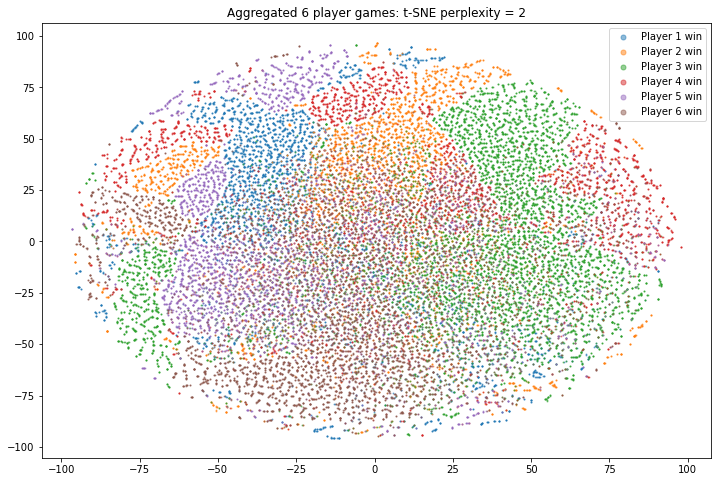

(40667, 2)


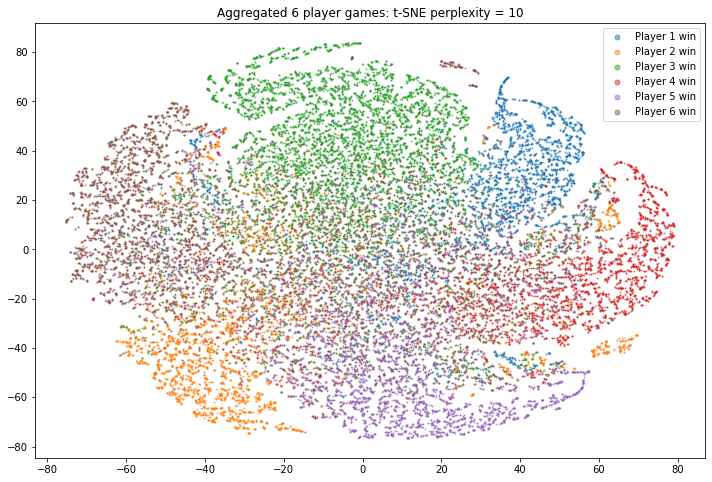

(40667, 2)


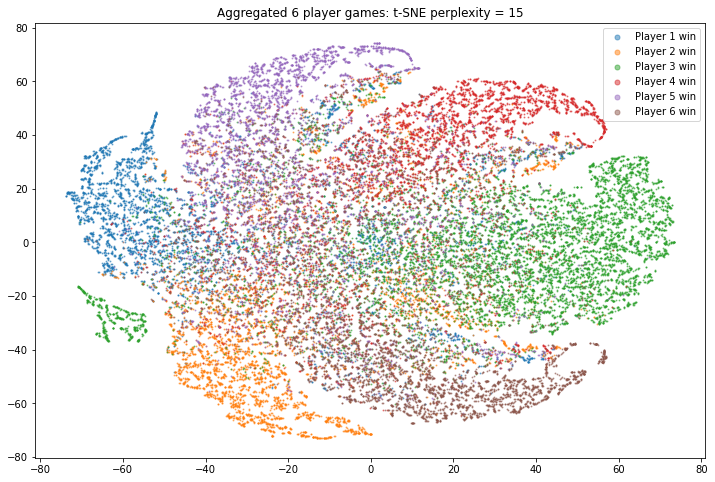

(40667, 2)


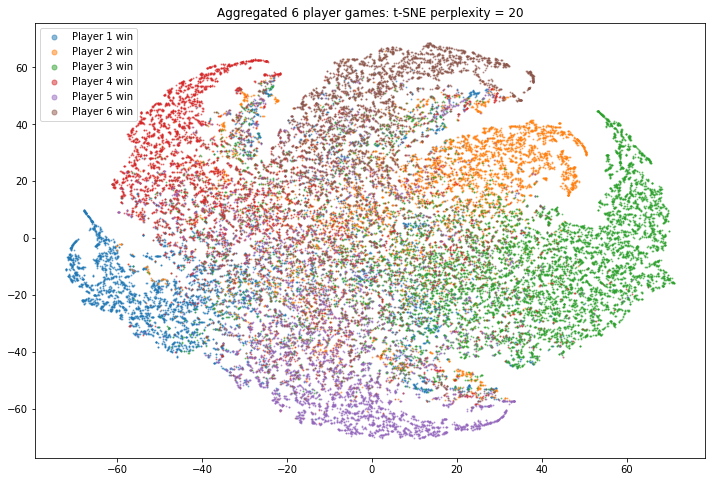

(40667, 2)


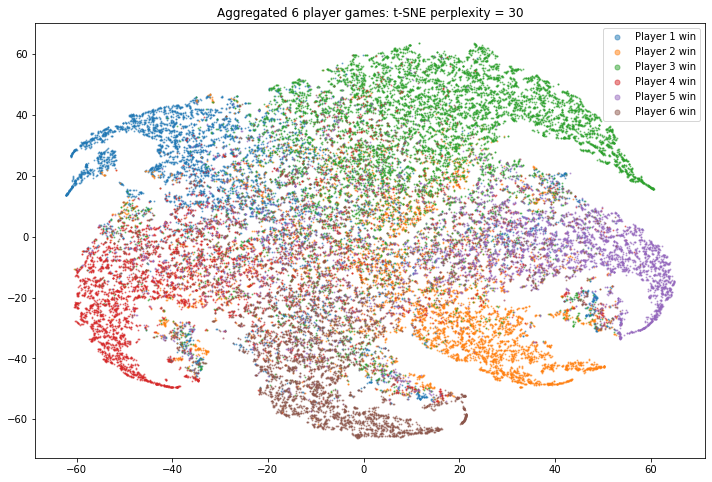

(40667, 2)


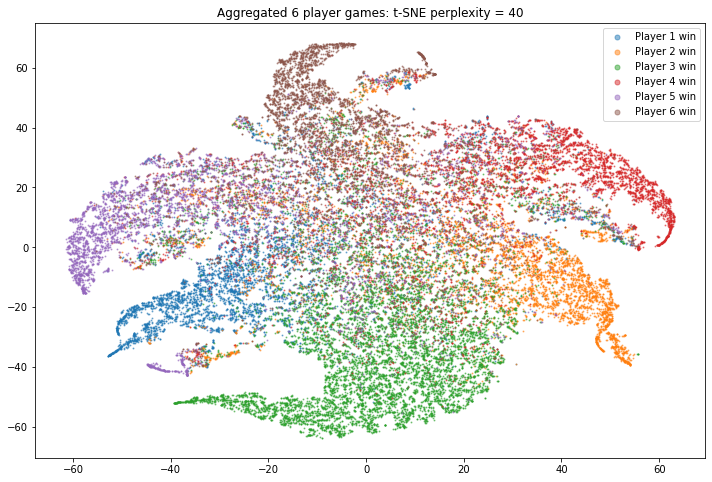

(40667, 2)


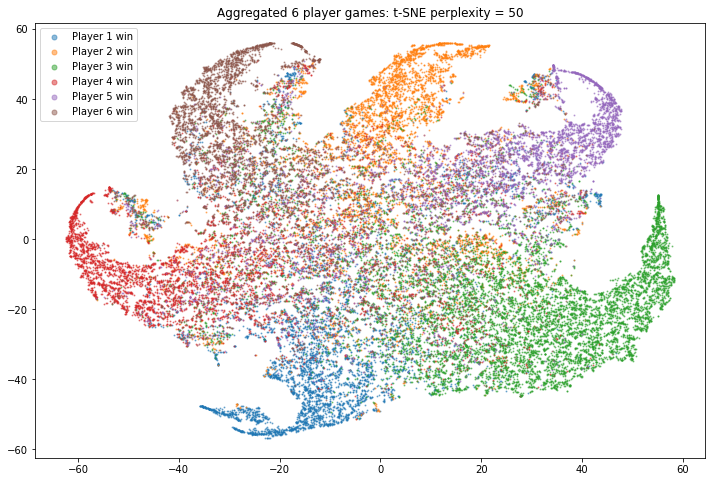

In [13]:
#best_winner_weights = run_regression(w=1)
tsne_Xs = []

for perplex in [2, 10, 15, 20, 30, 40 ,50]:
    tsne = TSNE(n_components=2, n_jobs=-1, perplexity=perplex)
    X_embedded = tsne.fit_transform(X.values)
    plot_tsne(X_embedded, y, perplex)
    tsne_Xs.append(X_embedded)

(40667, 2)


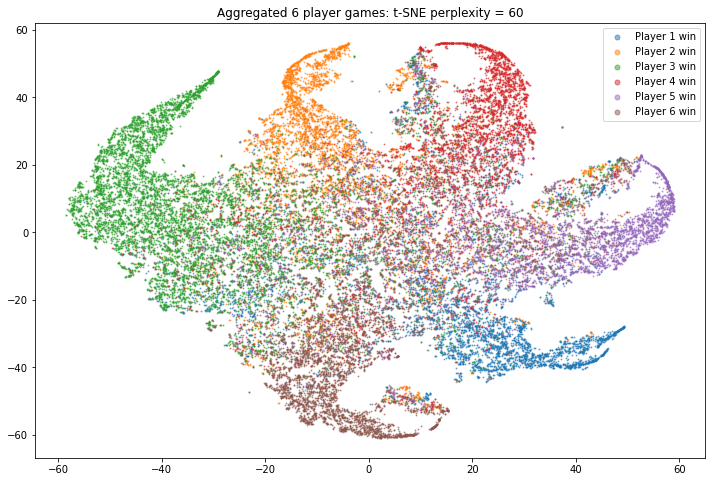

(40667, 2)


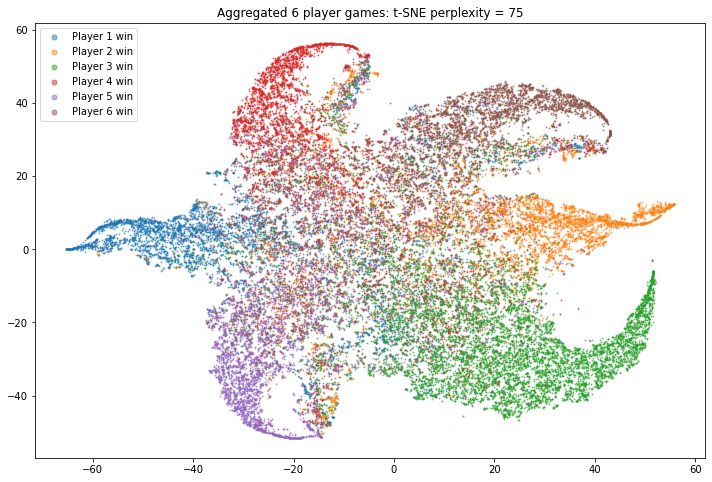

(40667, 2)


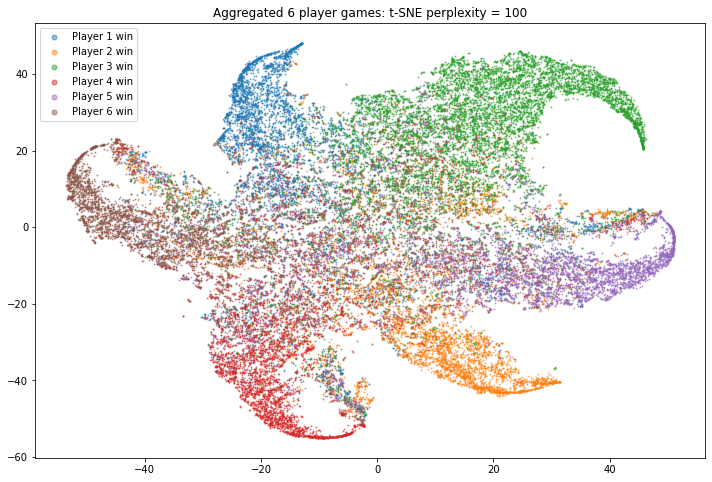

In [14]:
for perplex in [60, 75, 100]:
    tsne = TSNE(n_components=2, n_jobs=-1, perplexity=perplex)
    X_embedded = tsne.fit_transform(X.values)
    plot_tsne(X_embedded, y, perplex)
    tsne_Xs.append(X_embedded)

(40667, 2)


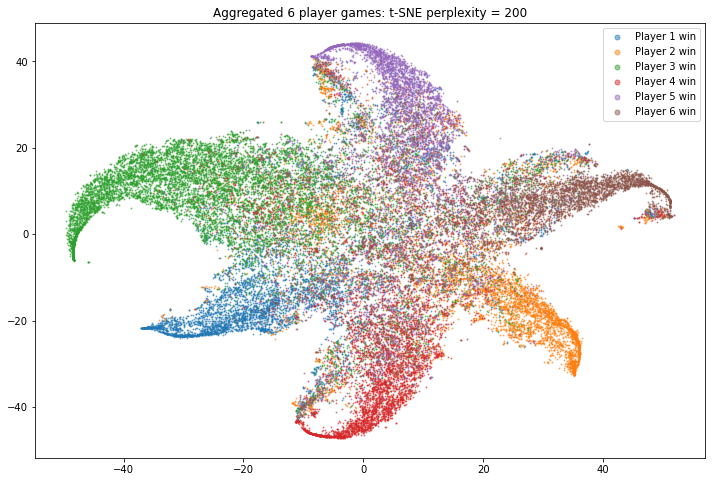

(40667, 2)


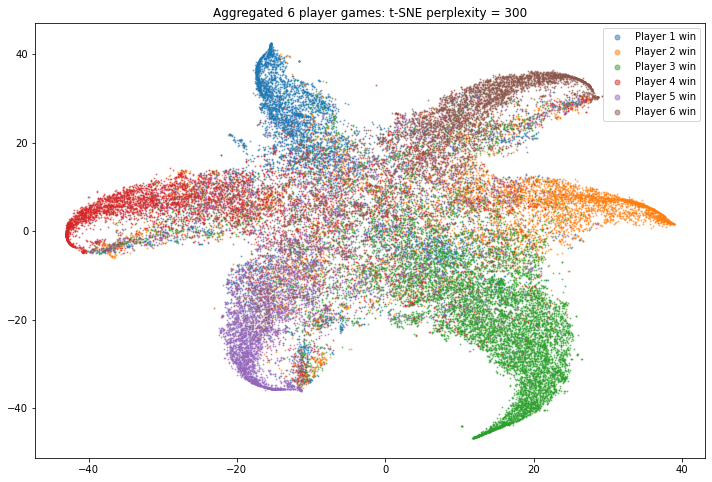

In [15]:
for perplex in [200, 300]:
    tsne = TSNE(n_components=2, n_jobs=-1, perplexity=perplex)
    X_embedded = tsne.fit_transform(X.values)
    plot_tsne(X_embedded, y, perplex)
    tsne_Xs.append(X_embedded)

(40667, 2)


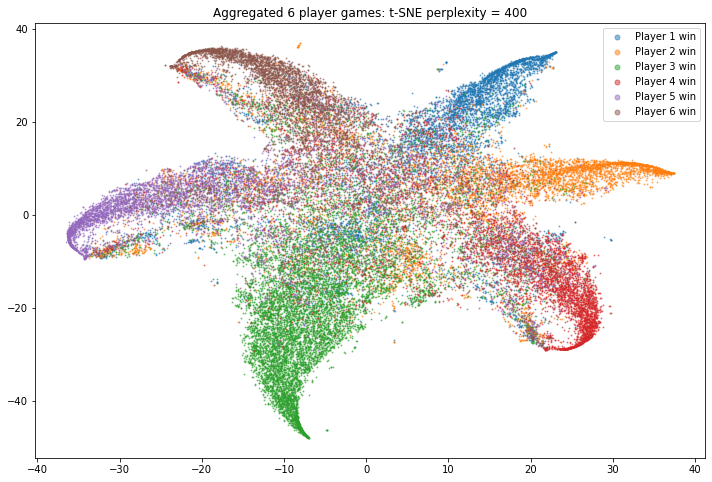

(40667, 2)


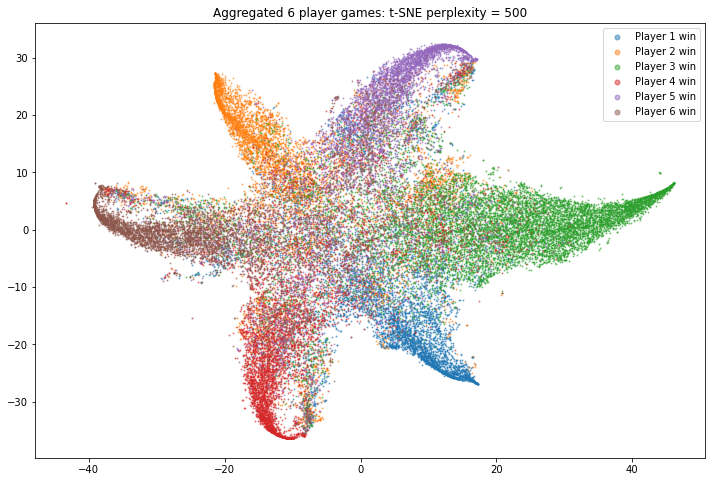

(40667, 2)


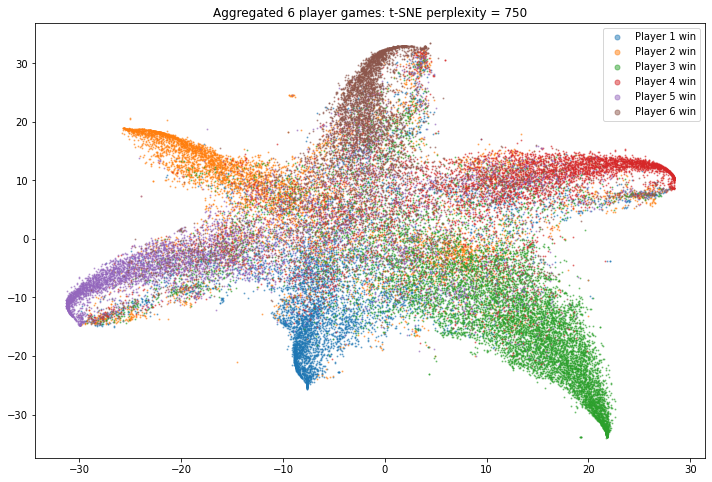

(40667, 2)


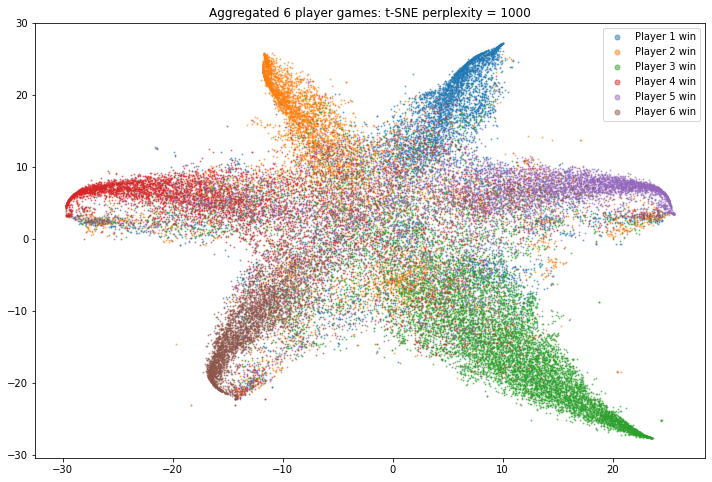

In [16]:
for perplex in [400, 500, 750, 1000]:
    tsne = TSNE(n_components=2, n_jobs=-1, perplexity=perplex)
    X_embedded = tsne.fit_transform(X.values)
    plot_tsne(X_embedded, y, perplex)
    tsne_Xs.append(X_embedded)

(40667, 2)


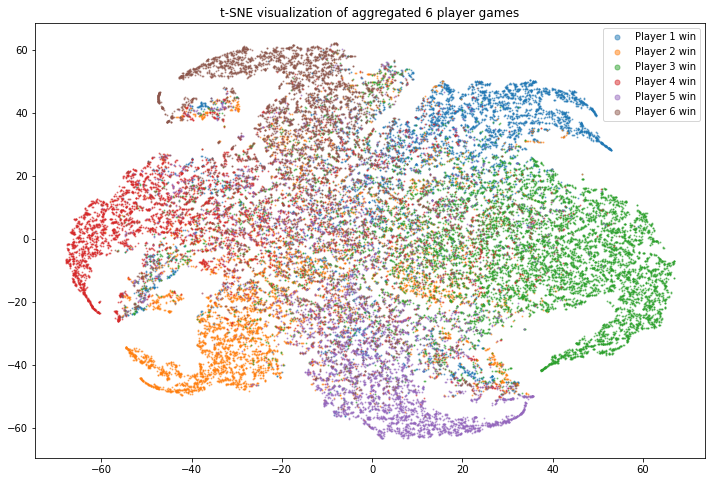

In [31]:
def plot_tsne3d(X_3d, y_winners):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    for winner in np.unique(y_winners):
        xs = X_3d[y_winners == winner]
        ax.scatter(xs[:,0], xs[:,1], xs[:,2], s=4, marker='.', alpha=0.5, label="Player {} win".format(winner+1))
    plt.legend(markerscale=5)
    plt.title(f"Aggregated 6 player games: t-SNE perplexity = {perplex}")
    plt.show()

In [19]:
tsne = TSNE(n_components=3, n_jobs=-1, perplexity=400)
X_3d = tsne.fit_transform(X.values)
y_winners = np.argmax(y.values, axis=1)

TypeError: plot_tsne3d() missing 1 required positional argument: 'y_winners'

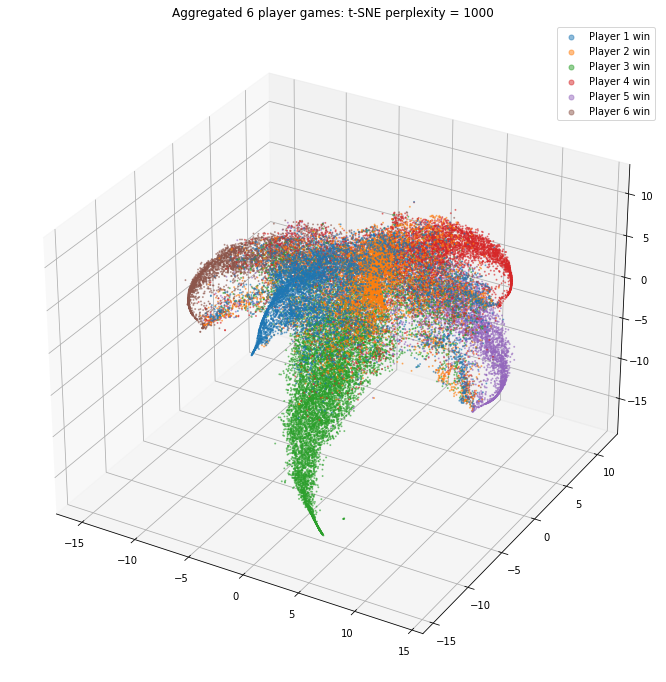

In [36]:
%matplotlib inline
plot_tsne3d(X_3d, y_winners)

In [51]:
perps = [2, 10, 15, 20, 30, 40 ,50,60, 75, 100,200, 300,400, 500, 750, 1000]
print(perps.index(20), perps.index(300), len(perps)-1)

3 11 15


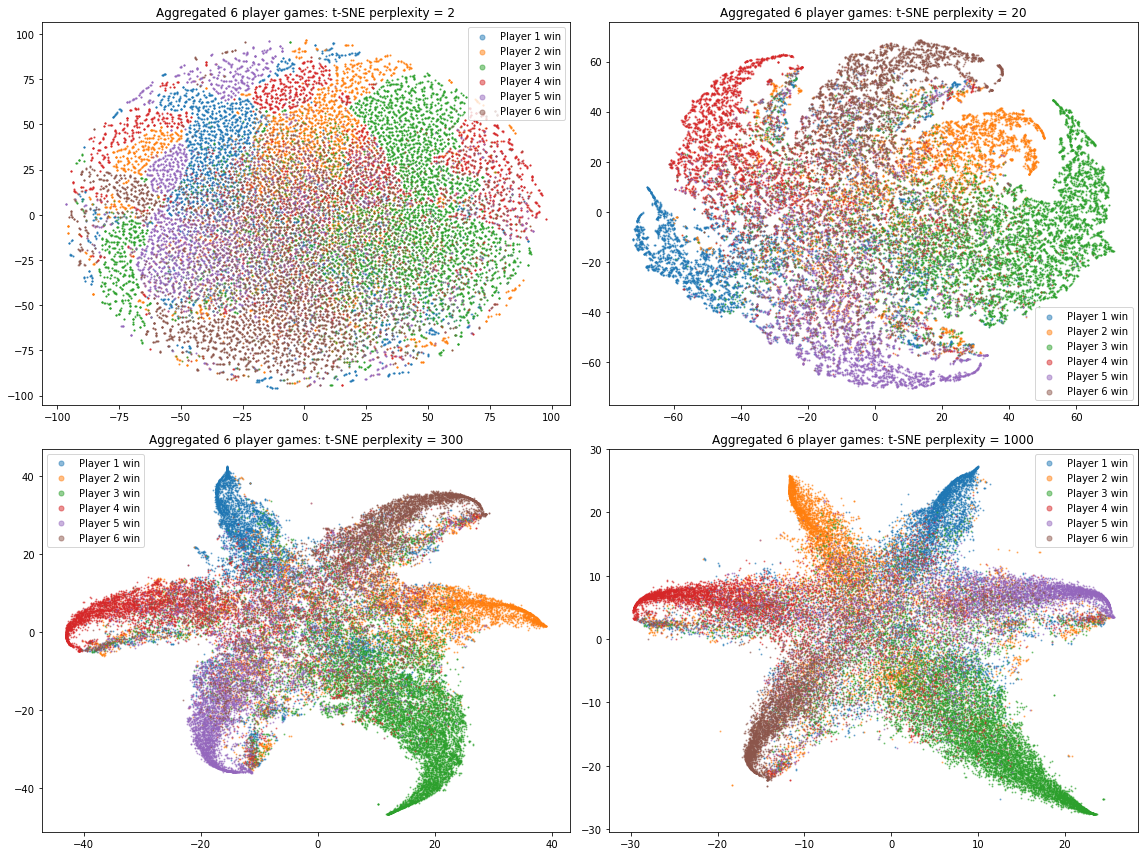

In [45]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
for i,j in enumerate([0,3,11,15]):
    ax = axs[i//2][i%2]
    plot_tsne(tsne_Xs[j],y,perps[j],ax)
plt.tight_layout()

In [46]:
tsnes = {f"X_2d_{perp}":tsne_Xs[i] for i, perp in enumerate(perps)}
tsnes['X_3d_300'] = X_3d

with open("tsnes.npz", 'wb') as f:
    np.savez(f,**tsnes)

In [55]:
with open("tsnes.npz", 'rb') as f:
    npzfile = np.load(f)
    tsne_dict = {key:npzfile[key] for key in npzfile.files}
tsne_dict

{'X_2d_2': array([[ 27.33319 , -14.994775],
        [-40.184784,  42.62402 ],
        [ 24.409672,  54.50693 ],
        ...,
        [ 24.484652, -85.29524 ],
        [-27.850424,  61.703762],
        [-27.833601,  61.73633 ]], dtype=float32),
 'X_2d_10': array([[ -9.942629,  16.450304],
        [ 50.37812 ,  24.974308],
        [-10.286497,  69.01104 ],
        ...,
        [-12.03907 ,  82.08884 ],
        [ 44.58003 ,  43.462276],
        [ 44.420597,  43.523235]], dtype=float32),
 'X_2d_15': array([[ 22.24929  ,  -5.730305 ],
        [-66.24655  ,   0.1324448],
        [ 61.91362  ,  21.98637  ],
        ...,
        [-65.222015 , -20.845716 ],
        [-63.35411  ,  22.832394 ],
        [-63.13904  ,  22.92183  ]], dtype=float32),
 'X_2d_20': array([[ 18.637108,  -9.338328],
        [-50.41641 , -23.360468],
        [ 65.7737  ,   9.926211],
        ...,
        [ 58.10881 ,  40.506737],
        [-63.137474, -14.698383],
        [-62.979454, -14.44505 ]], dtype=float32),
 'X_2d_30

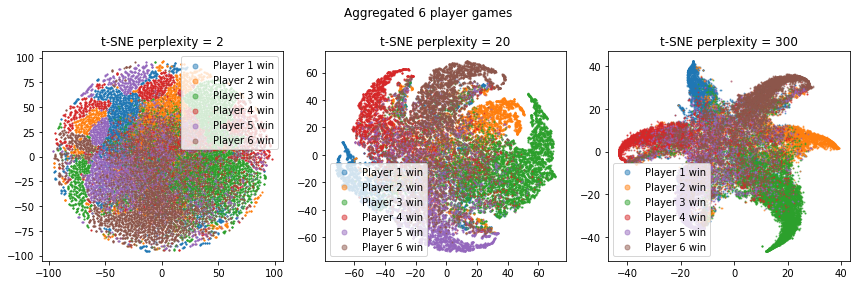

In [64]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
for i,j in enumerate([0,3,11]): #15
    perp = perps[j]
    key = f"X_2d_{perp}"
    ax = axs[i]
    plot_tsne(tsne_dict[key],data["y"],perp,ax)
plt.tight_layout()